# David Böhler, Nico Knünz, Julian Mathis

# SGD and Backpropagation - Exercises

**NOTICE:**
1. You are allowed to work in groups of up to three people but **have to document** your group's\
 members in the top cell of your notebook.
2. **Comment your code**, explain what you do (refer to the slides). It will help you understand the topics\
 and help me understand your thinking progress. Quality of comments will be graded.
3. **Discuss** and analyze your results, **write-down your learnings**. These exercises are no programming\
 exercises it is about learning and getting a touch for these methods. Such questions might be asked in the\
 final exams.
 4. Feel free to **experiment** with these methods. Change parameters think about improvements, write down\
 what you learned. This is not only about collecting points for the final grade, it is about understanding\
  the methods.

### Exercise 1 - Gradient Descent


**Summary:** In this exercise you will implement the gradient descent algorithm. It will\
help you to gain a better understanding on how neural networks are trained.


**Provided Code:** In the cell below I have provided you with a function ``f()`` and the first\
derivative of ``f()`` denoted ``dfdx()``.


**Your Tasks in this exercise:**
1. Implement the gradient descent algorithm.
2. Plot and analyze your results.





In [13]:
#@title **Provided Code:** ``f()`` and ``dfdx()`` function.

import matplotlib.pyplot as plt
import numpy as np

    
def f(x):
    return x**2

def dfdx(x):
    return 2*x

In [84]:
def gradient_descent(learning_rate, f, dfdx):
    # initialize w0 randomly
    w = np.random.randn()*5
    print(f"Initial point: {w}")
    
    # initialize plot
    fig, ax = plt.subplots()  
    ax.plot(np.arange(-10, 10, 0.1), f(np.arange(-10, 10, 0.1)))

    # limit the iterations to 10k
    for i in range(10000):
        # plot point
        ax.plot(w, f(w), 'o', color='tab:red')
        # calculate derivative
        derivative = dfdx(w)
        #print(f"derivative at {w_old}: {derivative}")
        
        # break if it is small enough
        if abs(derivative) < 0.001:
            ax.plot(w, f(w), 'o', color='tab:green')
            break

        # calculate new step
        w = w - learning_rate * derivative

    print(f"Minimum found: {w}")
    print(f"Iterations: {i}")
    return w
    

Initial point: 1.775898914226233
Minimum found: 0.00046104971767061407
Iterations: 37


0.00046104971767061407

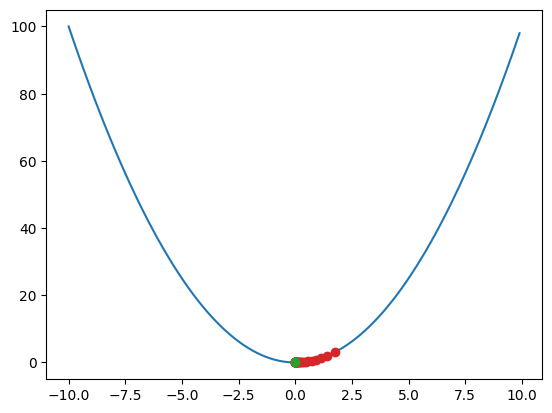

In [85]:
gradient_descent(0.1, f, dfdx)

**Setting a learning rate too high:**\
The points flip-flop around the minimum, eventually reaching the minimum after lots of iterations.

Initial point: -4.190790954492423
Minimum found: -0.0004915615535155302
Iterations: 448


-0.0004915615535155302

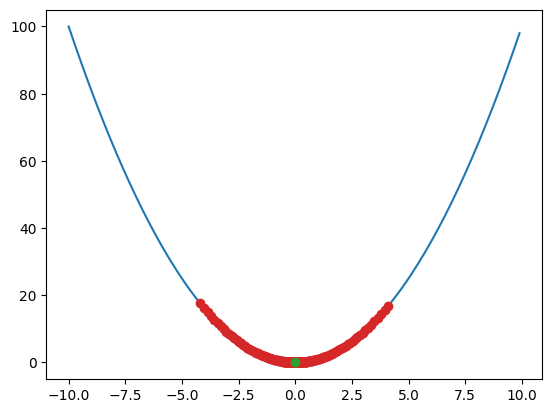

In [89]:
gradient_descent(0.99, f, dfdx)

**Setting a learning rate too low:**\
The gradient descent algorythm takes lots of iterations to reach the minimum.

Initial point: -6.940787990475572
Minimum found: -0.0004993878975525775
Iterations: 4765


-0.0004993878975525775

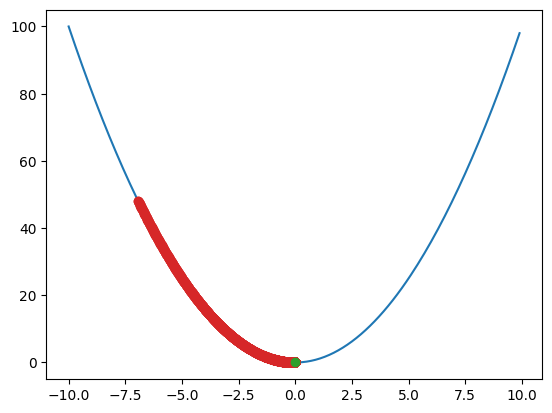

In [94]:
gradient_descent(0.001, f, dfdx)

### Exercise 2 - Gradient Descent with Momentum


**Summary:** In this exercise you will improve the gradient descent algorithm from the\
previous exercise to act using the momentum idea.


**Provided Code:** In the cell below I have provided you with a function ``g()``.


**Your Tasks in this exercise:**
1. Calculate the gradient of ``g()`` with respect to x.
2. Extend your implementation of gradient descent with momentum.
3. Try to find a minimum of ``g()``.
4. Answer the following questions:
    * What is a good value fo $\alpha$?
    * What is the impact of the initialization of your optimization (the starting point)?
    * Why do neural networks produce different results if trained multiple times?




first derivative:
−xe−x2(2sin(x3)−3xcos(x3)

In [55]:
# A non-convex function.
#
def g(x):
    return np.exp(-(x**2)) * np.sin(x**3)

def dgdx(x):
    return -x*np.exp(-(x**2))*(2*np.sin(x**3)-3*x*np.cos(x**3))

In [139]:
def gradient_descent_momentum(learning_rate, f, dfdx, w0 = np.random.randn()*5, alpha = 0.8, steps = 10000, ):

    # initialize plot
    fig, ax = plt.subplots()  
    ax.plot(np.arange(-5, 5, 0.1), f(np.arange(-5, 5, 0.1)))

    
    # initialize start values
    print(f"Initial point: {w0}")
    w_current = w0
    w_old = w0
    for i in range(steps):
        # plot point
        ax.plot(w_current, f(w_current), 'o', color='tab:red')
        
        # calculate derivative
        derivative = dfdx(w_old)
        
        # calculate delta
        delta = w_current - w_old
        
        # calculate new step
        w_new = w_current - learning_rate * derivative + alpha * delta

        # break if step size gets low
        ## THIS DOESNT WORK
        ## it might stop at a turning point! Better to have a fixed amount of steps
        #if abs(w_current - w_new) < 0.001:
            #ax.plot(w_current, f(w_current), 'o', color='tab:green')
            #print(f"Minimum found: {w_current}")
            #print(f"Iterations: {i}")
            #break

        #update historic values
        w_old = w_current
        w_current = w_new
        
        if i == steps-1:
            # plot last point
            print(f"Minimum found: {w_current}")
            print(f"Iterations: {i+1}")
            ax.plot(w_current, f(w_current), 'o', color='tab:green')
        
    return w_old

Initial point: 0.95
Minimum found: -0.9966671661745878
Iterations: 200


np.float64(-0.9959890023608983)

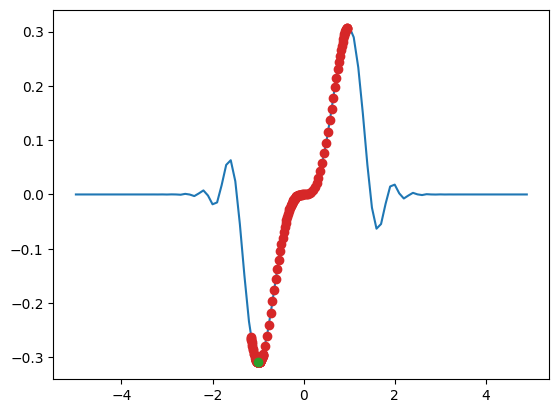

In [140]:
gradient_descent_momentum(learning_rate = 0.01, f = g,dfdx = dgdx, w0 = 0.95, alpha = 0.9, steps = 200)

**Alpha too low:**\
Not enough momentum to overcome local minimum.

Initial point: 0.95
Minimum found: 0.03181396198777006
Iterations: 1000


np.float64(0.03184779405742236)

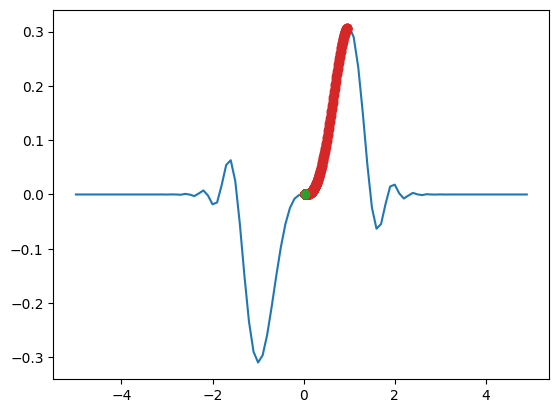

In [141]:
gradient_descent_momentum(learning_rate = 0.01, f = g,dfdx = dgdx, w0 = 0.95, alpha = 0.1, steps = 1000)

**Alpha too high:**\
Momentum almost overshoots minimum.

Initial point: 0.95
Minimum found: -0.7668732029183326
Iterations: 200


np.float64(-0.8040355102203215)

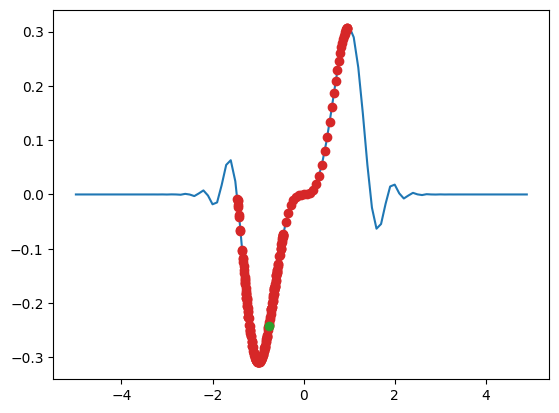

In [142]:
gradient_descent_momentum(learning_rate = 0.01, f = g,dfdx = dgdx, w0 = 0.95, alpha = 0.97, steps = 200)

**Slope at starting point too low:**\
Not enough momentum built up to overcome local minimum.

Initial point: 0.3
Minimum found: -0.0058230686232639715
Iterations: 200


np.float64(-0.005813257287316859)

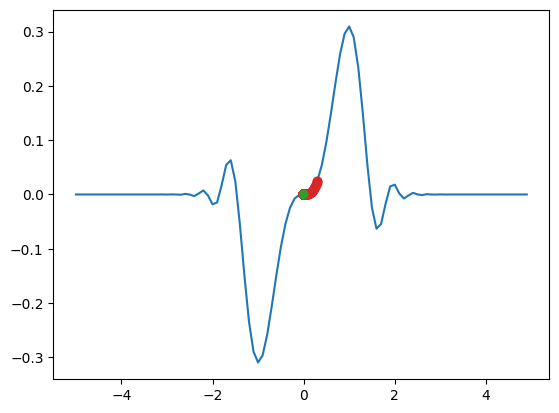

In [143]:
gradient_descent_momentum(learning_rate = 0.01, f = g,dfdx = dgdx, w0 = 0.3, alpha = 0.9, steps = 200)

**Solution:**\
Higher alpha. But still, the point swings around the minimum for seemingly forever.

Initial point: 0.3
Minimum found: 0.31858814805589386
Iterations: 100000


np.float64(0.3079117592915229)

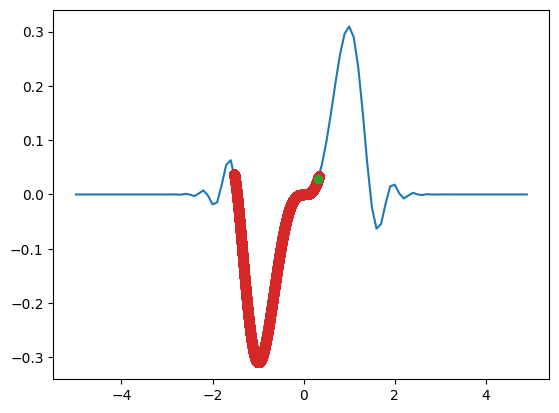

In [148]:
gradient_descent_momentum(learning_rate = 0.01, f = g,dfdx = dgdx, w0 = 0.3, alpha = 0.99, steps = 100000)

**Starting at the right side:**\
The global minimum can never be found.

Initial point: 1
Minimum found: 1.6307209323869327
Iterations: 200


np.float64(1.6301172758506763)

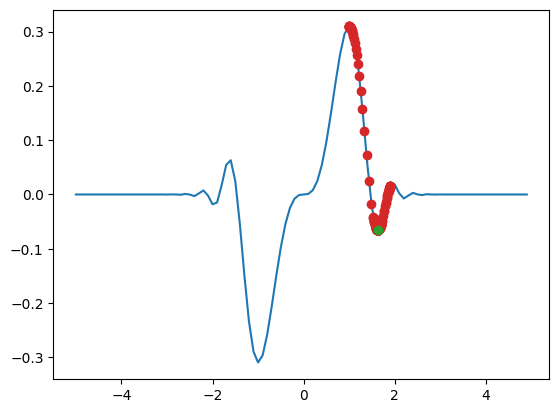

In [152]:
gradient_descent_momentum(learning_rate = 0.01, f = g,dfdx = dgdx, w0 = 1, alpha = 0.9, steps = 200)

* **What is a good value fo $\alpha$?**\
It is 0.9 for this example. Depending on the target function, this might be different.
* **What is the impact of the initialization of your optimization (the starting point)?**\
If it is set on a point with a low gradient, it might not move at all. Depending on the shape of the target function, a local minimum could be found instead of the global minimum.
* **Why do neural networks produce different results if trained multiple times?**\
Usually the initialization is chosen randomly, so each time another local minimum could be found.